In [2]:
import numpy as np
import cv2
import matplotlib 
import matplotlib.pyplot as plt
from PIL import Image
import skimage

In [3]:
def normalize(mask):   #归一化函数
    return (mask - mask.min()) / (mask.max() - mask.min())

In [4]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\lenna-RGB.tif")

img_rgb = img_ori[:,:,::-1] #显示为RGB图像

img_b = img_ori[:, :, 0]
img_g = img_ori[:, :, 1]
img_r = img_ori[:, :, 2]

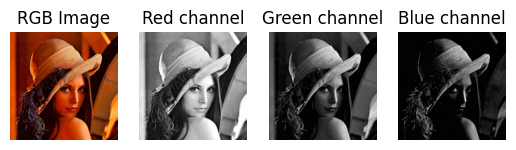

In [5]:
plt.figure()
plt.subplot(141),plt.title('RGB Image'),plt.imshow(img_rgb,),plt.axis('off')
plt.subplot(142),plt.title('Red channel'),plt.imshow(img_r,'gray'),plt.axis('off')
plt.subplot(143),plt.title('Green channel'),plt.imshow(img_g,'gray'),plt.axis('off')
plt.subplot(144),plt.title('Blue channel'),plt.imshow(img_b,'gray'),plt.axis('off')
plt.show()

In [6]:
'''RGB转化为CMY或CMYK'''
def rgb2cmy(img):
    '''将rgb图像转化为cmy图像'''
    def normalize(mask):   #归一化函数
        return (mask - mask.min()) / (mask.max() - mask.min())
    img_norm = normalize(img).astype(np.float32)
    img_cmy = 1-img_norm
    img_cmy = np.uint8(img_cmy * 255)
    return img_cmy

def rgb2cmyk(img):
    '''将rgb图像转化为cmyk图像'''
    height, width, channel = img.shape[:3]
    img_cmy = 1 - normalize(img).astype(np.float32)  #先转换为cmy图像
    img_c = np.zeros((height, width), dtype=np.float32)
    img_m = np.zeros((height, width), dtype=np.float32)
    img_y = np.zeros((height, width), dtype=np.float32)
    img_k = np.zeros((height, width), dtype=np.float32)
    for h in range(height):
        for w in range(width):   #依次遍历每个像素
            temp = img[h, w]
            k = min(temp[0], temp[1], temp[2])
            c, m, y = img_cmy[h, w]
            if k == 1:   #产生无颜色贡献的纯黑色
                img_c[h, w] = 0
                img_m[h, w] = 0
                img_y[h, w] = 0
                img_k[h, w] = 1
            else:
                img_c[h, w] = (c - k) / (1 - k)
                img_m[h, w] = (m - k) / (1 - k)
                img_y[h, w] = (y - k) / (1 - k)
                img_k[h, w] = k

    img_cmyk = np.dstack((img_c, img_m, img_y, img_k))
    img_dst = normalize(img_cmyk)
    img_dst = np.uint8(normalize(img_cmyk) * 255)
    
    return img_dst

def cmyk2rgb(img):
    height, width, channel = img.shape[:3]
    img_cmyk = normalize(img).astype(np.float32)  #归一化处理
    img_c = np.zeros((height, width), dtype=np.float32)
    img_m = np.zeros((height, width), dtype=np.float32)
    img_y = np.zeros((height, width), dtype=np.float32)

    for h in range(height):
        for w in range(width):   #依次遍历每个像素
            temp = img[h,w]
            k = min(temp[0], temp[1], temp[2])
            c, m, y, k = img_cmyk[h, w]
            img_c[h, w] = c*(1-k)+k
            img_m[h, w] = m*(1-k)+k
            img_y[h, w] = y*(1-k)+k
    img_cmy = np.dstack((img_c, img_m, img_y))
    img_dst = normalize(img_cmy)
    img_rgb = 1 - img_dst
    img_dst = np.uint8(normalize(img_rgb) * 255)
    
    return img_dst

In [7]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\lenna-RGB.tif")

img_rgb = img_ori[:,:,::-1] #显示为RGB图像
img_cmy = rgb2cmy(img_rgb)
img_cmyk = rgb2cmyk(img_rgb)


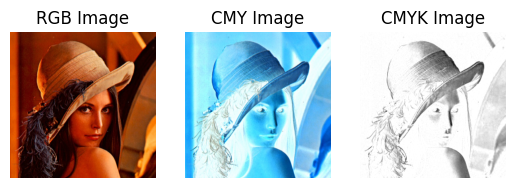

In [8]:
plt.figure()
plt.subplot(131),plt.title('RGB Image'),plt.imshow(img_rgb,),plt.axis('off')
plt.subplot(132),plt.title('CMY Image'),plt.imshow(img_cmy,'gray'),plt.axis('off')
plt.subplot(133),plt.title('CMYK Image'),plt.imshow(img_cmyk,'gray'),plt.axis('off')

plt.show()

In [9]:
'''HSI模型'''
def rgb2hsi(img):
    '''将RGB图像转化为HSI图像'''
    img_rgb = img.copy().astype(np.float32)   #转为float
    img_rgb = normalize(img_rgb)         #归一化
    H = np.zeros(img_rgb.shape[:2]).astype(np.float32) 
    S = np.zeros(img_rgb.shape[:2]).astype(np.float32) 
    I = np.zeros(img_rgb.shape[:2]).astype(np.float32) 

    height,width = img_rgb.shape[:2]
    for h in range(height):
        for w in range(width):
            temp = img_rgb[h,w]
            R,G,B = temp[:3]
            numerator = ((R - G) + (R - B)) / 2
            denominator = np.power((R - G)**2 + (R - B) * (G - B), 1/2)
            theta = np.arccos(numerator / (denominator + 1e-5))
            if B <= G:
                H[h, w] = theta / 360
            else:
                H[h, w] = (360 - theta) / 360

            S[h, w] = 1 - ((3 * min(R, G, B))/ (R + G + B + 1e-5))
            I[h, w] = (R + G + B + 1e-5) / 3
    img_HSI = np.dstack((H, S, I))
    img_HSI = np.uint8(normalize(img_HSI) * 255)
    
    return img_HSI        


In [10]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\RGB-color-cube.tif")

img_rgb = img_ori[:,:,::-1] #显示为RGB图像

#法1 利用写的函数将RGB图像转为HSI图像
img_hsi = rgb2hsi(img_rgb)
#法2 opencv颜色空间转换函数
img_hsi1 = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV_FULL)


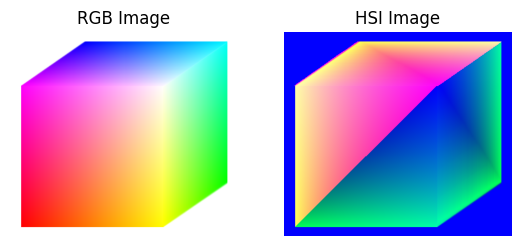

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(131),plt.title('RGB Image'),plt.imshow(img_rgb,),plt.axis('off')
plt.subplot(132),plt.title('HSI Image'),plt.imshow(img_hsi,),plt.axis('off')

plt.show()

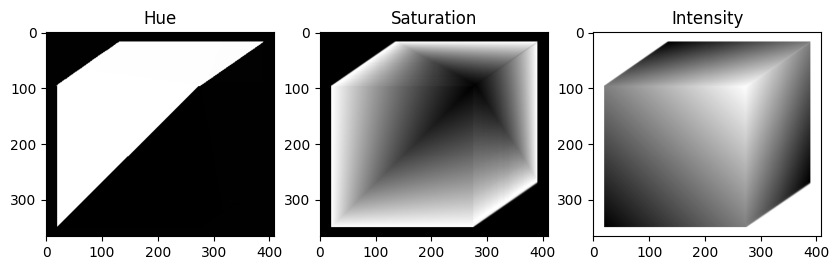

In [12]:
'''显示H、S、I分量'''
plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1), plt.imshow(img_hsi[:, :, 0], 'gray'), plt.title('Hue')
plt.subplot(1, 3, 2), plt.imshow(img_hsi[:, :, 1], 'gray'), plt.title('Saturation')
plt.subplot(1, 3, 3), plt.imshow(img_hsi[:, :, 2], 'gray'), plt.title('Intensity')

plt.show()


In [13]:
'''灰度分层和颜色编码'''
def gray_slice8(img_gray):
    '''灰度分层函数'''
    img_ori = img_gray /255
    rows , cols = img_ori.shape[:2]
    labels = np.zeros([rows,cols])
    for i in range(rows):
        for j in range(cols):
            if(img_ori[i,j] < 0.125):
                labels[i,j] = 0
            elif(img_ori[i,j] < 0.25):
                labels[i,j] = 0.2
            elif(img_ori[i,j] < 0.375):
                labels[i,j] = 0.4
            elif(img_ori[i,j] < 0.5):
                labels[i,j] = 0.5
            elif(img_ori[i,j] < 0.625):
                labels[i,j] = 0.6
            elif(img_ori[i,j] < 0.75):
                labels[i,j] = 0.8
            elif(img_ori[i,j] < 0.875):
                labels[i,j] = 0.9
            else:
                labels[i,j] = 1
                
    return labels

KeyboardInterrupt: 

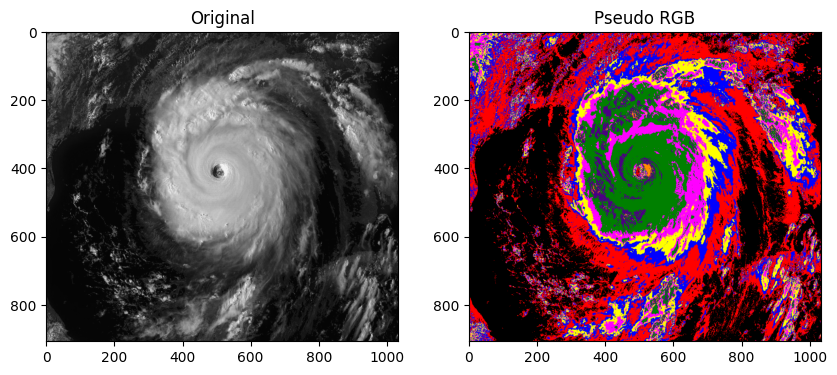

In [14]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\hurricane-katrina.tif", 0)

labels = gray_slice8(img_ori)
labels = np.uint8(labels * 255)
#彩色编码
img_rgb = skimage.color.label2rgb(labels)

plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(img_ori, 'gray'), plt.title('Original')
plt.subplot(122), plt.imshow(img_rgb, ), plt.title('Pseudo RGB')

plt.tight_layout()
plt.show()


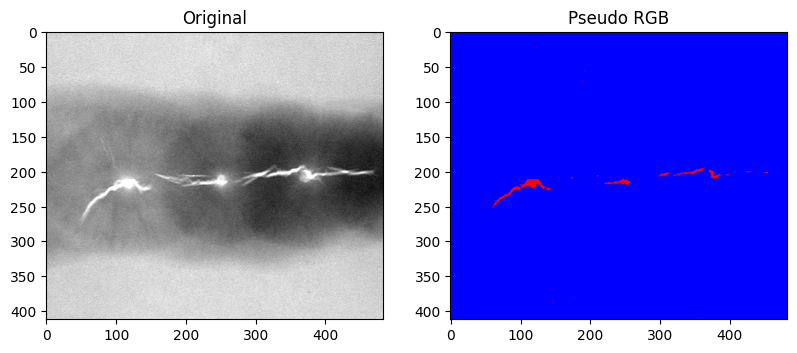

In [ ]:
'''焊接图像的灰度分层'''
def gray_slice2(img_gray):

    rows,cols = img_gray.shape[:2]
    labels = np.zeros([rows,cols], np.uint8)
    for i in range(rows):
        for j in range(cols):
            if(img_gray[i,j] < 250):
                labels[i,j] = 125
            else:
                labels[i,j] = 100
                
    return labels

img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\weldXray.tif",0)
labels = gray_slice2(img_ori)
img_rgb = skimage.color.label2rgb(labels)

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(img_ori, 'gray'), plt.title('Original')

plt.subplot(142), plt.imshow(img_rgb, ), plt.title('Pseudo RGB')
plt.show()

In [ ]:
'''灰度到彩色的变换'''
img_r = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\WashingtonDC-Band3-Red-512.tif",0)
img_g = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\WashingtonDC-Band2-Green-512.tif",0)
img_b = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\WashingtonDC-Band1-Blue-512.tif",0)
img_ir = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\WashingtonDC-Band4-NearInfrared-512.tif",0)

#用红外图像代替红色分量图像
img_irgb = np.dstack([img_ir, img_g, img_b])

#用红外图像代替绿色分量图像
img_RIRB = np.dstack([img_r, img_ir, img_b])

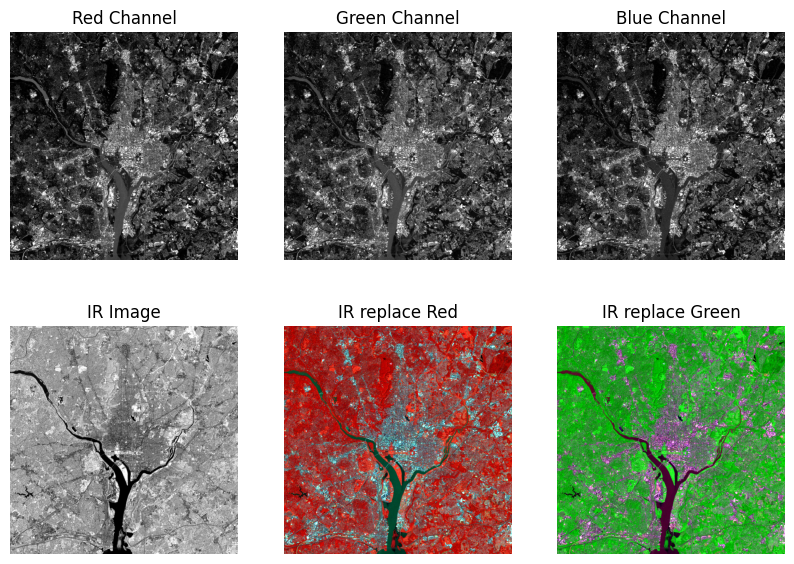

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(231),plt.title('Red Channel'),plt.axis('off'),plt.imshow(img_r,'gray')
plt.subplot(232),plt.title('Green Channel'),plt.axis('off'),plt.imshow(img_g,'gray')
plt.subplot(233),plt.title('Blue Channel'),plt.axis('off'),plt.imshow(img_b,'gray')
plt.subplot(234),plt.title('IR Image'),plt.axis('off'),plt.imshow(img_ir,'gray')
plt.subplot(235),plt.title('IR replace Red'),plt.axis('off'),plt.imshow(img_irgb)
plt.subplot(236),plt.title('IR replace Green'),plt.axis('off'),plt.imshow(img_RIRB)
plt.show()

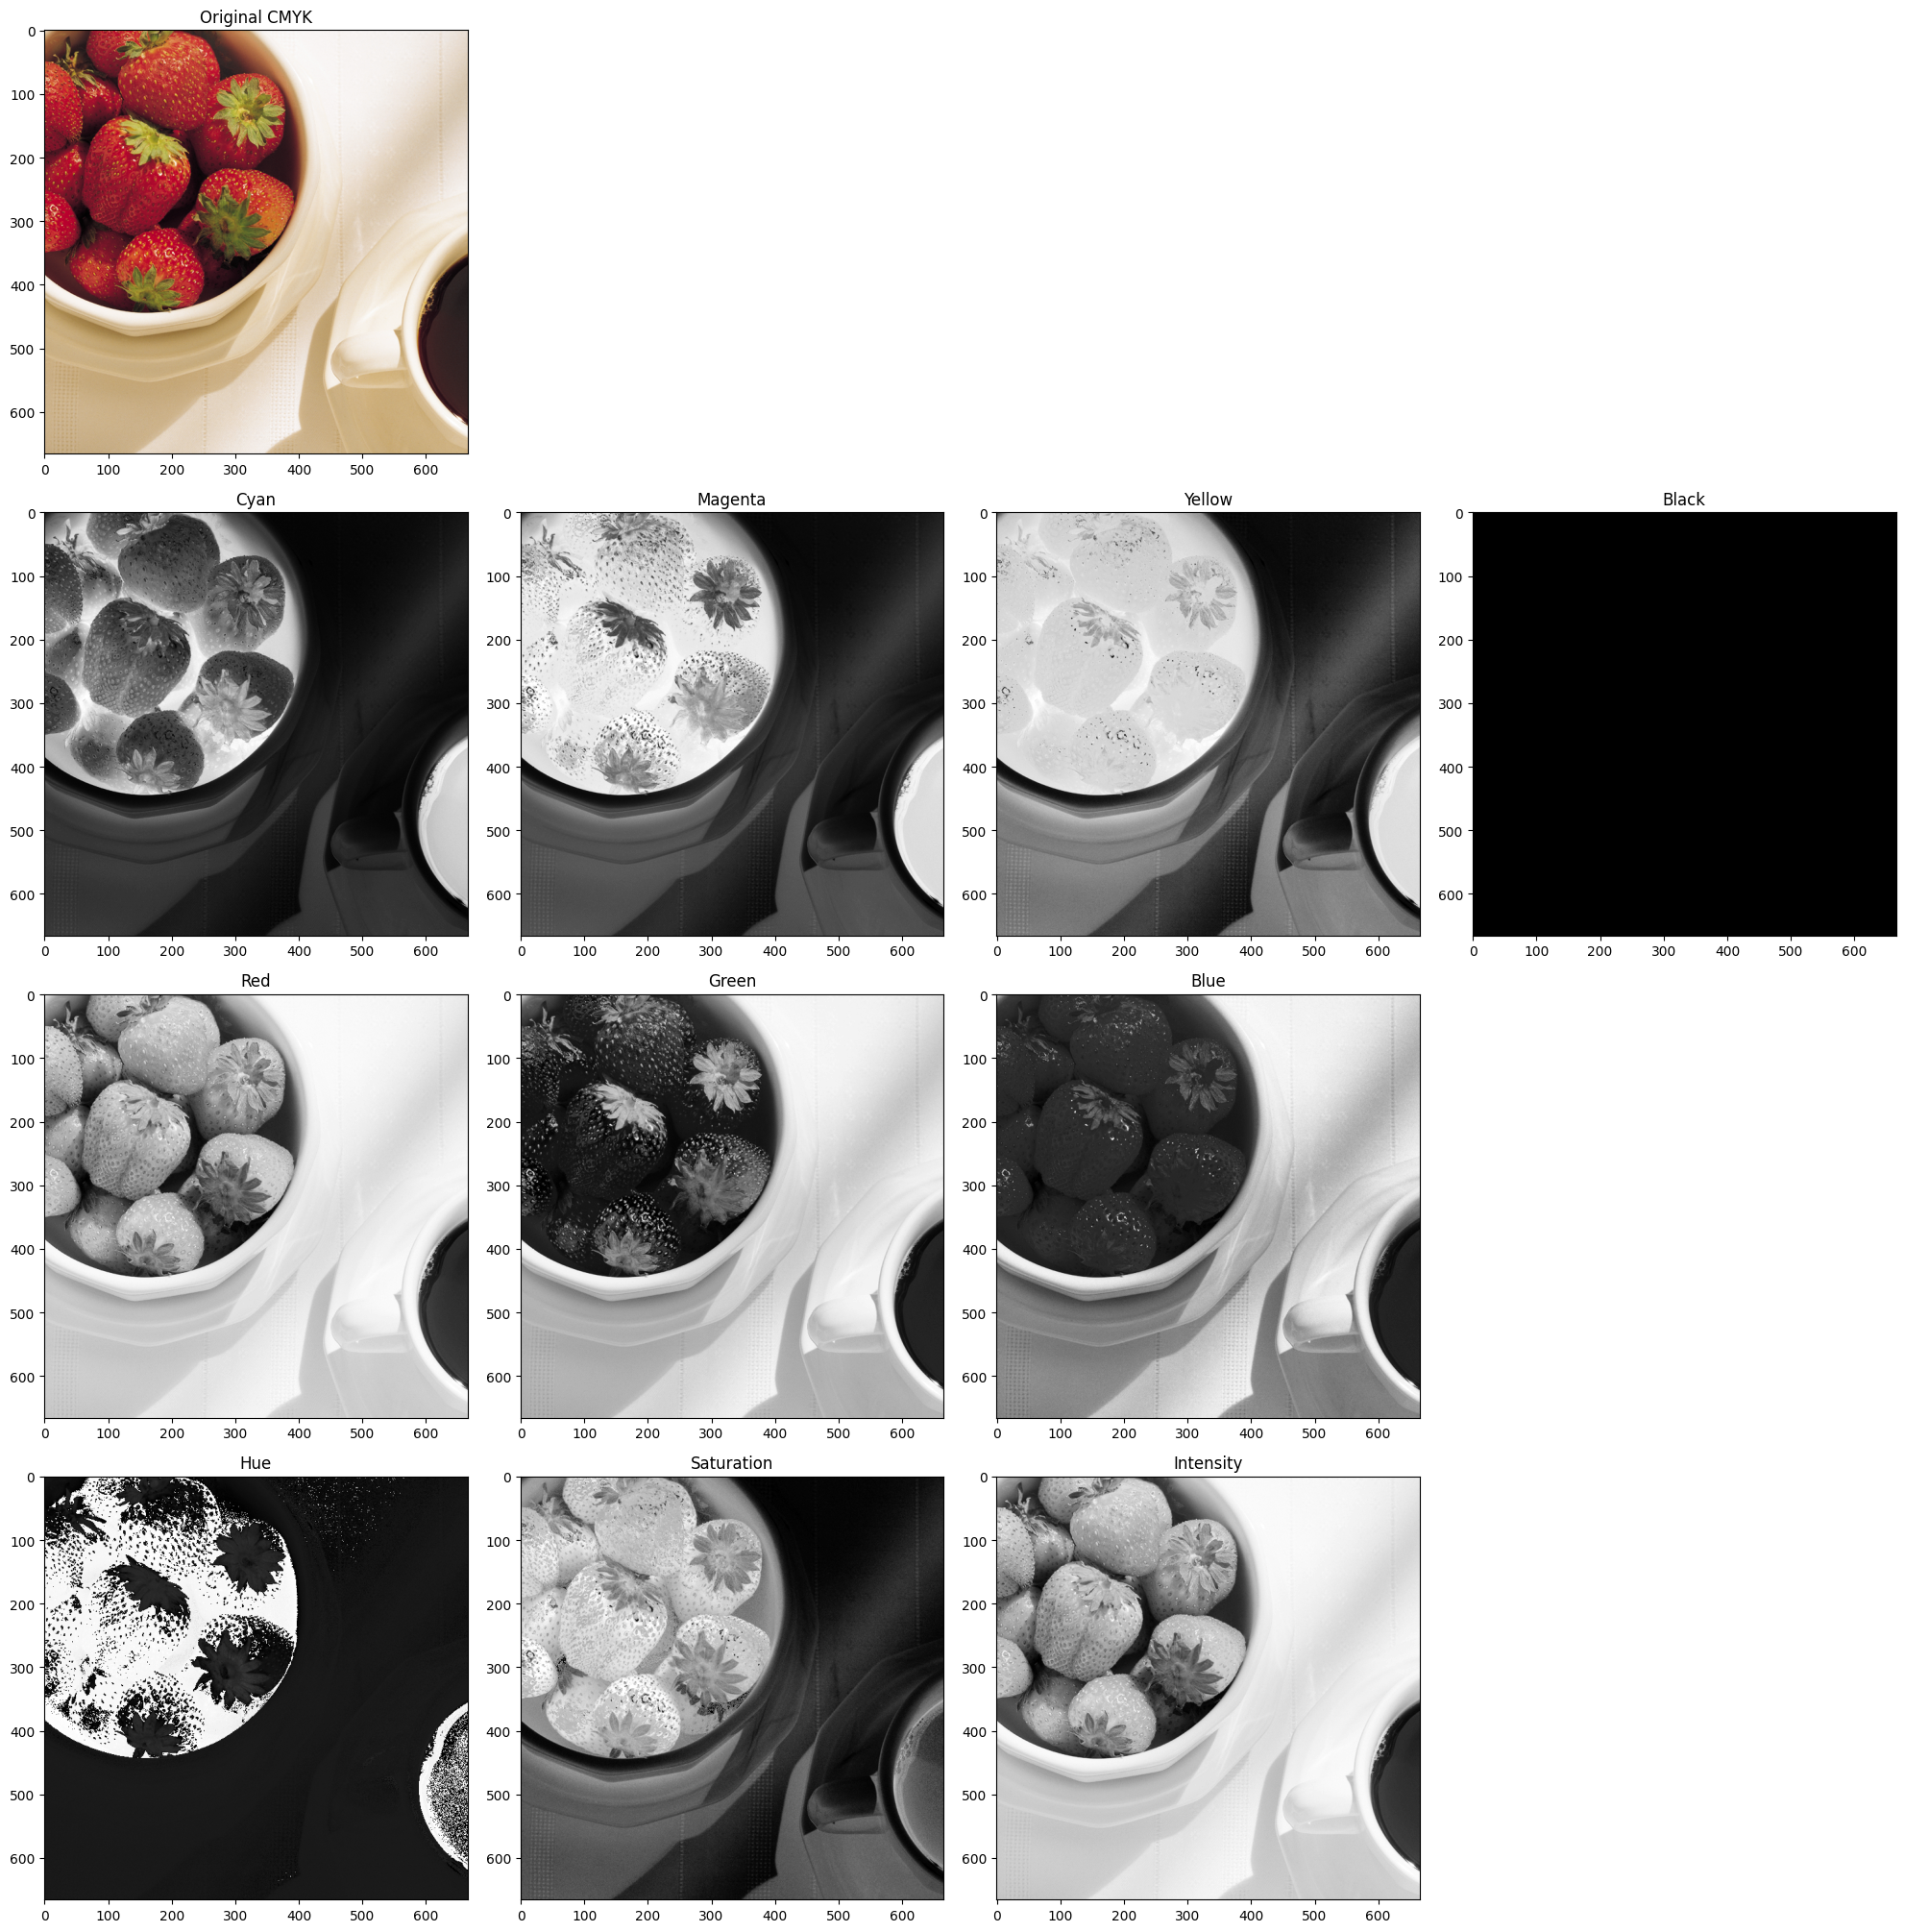

In [ ]:
'''彩色变换'''
img_ori = Image.open(r"C:\Users\23282\Desktop\PyL\DIP\imageset\strawberries-RGB.tif")

img_cmyk = img_ori.convert("CMYK")
img_temp = np.array(img_cmyk)
img_c = img_temp[:, :, 0]
img_m = img_temp[:, :, 1]
img_y = img_temp[:, :, 2]
img_k = img_temp[:, :, 3]

plt.figure(figsize=(20, 25))
plt.subplot(541), plt.imshow(img_cmyk), plt.title('Original CMYK')

# CMYK, seems is CMY, as K is all black
plt.subplot(545), plt.imshow(img_c, 'gray'), plt.title('Cyan')
plt.subplot(546), plt.imshow(img_m, 'gray'), plt.title('Magenta')
plt.subplot(547), plt.imshow(img_y, 'gray'), plt.title('Yellow')
plt.subplot(5, 4, 8), plt.imshow(img_k, 'gray'), plt.title('Black')

# Show RGB channels
img_rgb = np.array(img_ori)
plt.subplot(5, 4, 9), plt.imshow(img_rgb[:, :, 0], 'gray'), plt.title('Red')
plt.subplot(5, 4, 10), plt.imshow(img_rgb[:, :, 1], 'gray'), plt.title('Green')
plt.subplot(5, 4, 11), plt.imshow(img_rgb[:, :, 2], 'gray'), plt.title('Blue')

# Show HSI channels
img_hsi = img_ori.convert("HSV")
img_hsi = np.array(img_hsi)
plt.subplot(5, 4, 13), plt.imshow(img_hsi[:, :, 0], 'gray'), plt.title('Hue')
plt.subplot(5, 4, 14), plt.imshow(img_hsi[:, :, 1], 'gray'), plt.title('Saturation')
plt.subplot(5, 4, 15), plt.imshow(img_hsi[:, :, 2], 'gray'), plt.title('Intensity')

plt.tight_layout()
plt.show()

In [ ]:
'''色彩和颜色校正'''
def sigmoid_transform(img, scale = 30):
    '''利用S曲线对图像进行色调校正'''
    img = np.array(img).astype(float)
    img_temp = (img - 125.)
    img_new = 1 / (1 + np.exp(-img_temp / scale))
    
    img_new = np.uint8(normalize(img_new) * 255)
    
    return img_new

def gamma_transform(img, c = 1, gamma = 1):
    '''gamma校正'''
    img = np.array(img).astype(float)
    output_img = c * img ** gamma
    img_scale = np.uint8((output_img / output_img.max()) * 255)
    
    return img_scale


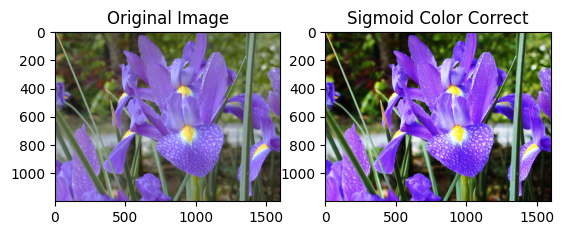

In [ ]:
img_ori = Image.open(r"C:\Users\23282\Desktop\PyL\DIP\imageset\iris-RGB.tif")

img_color = sigmoid_transform(img_ori,scale=30)

plt.figure()
plt.subplot(121),plt.title('Original Image'),plt.imshow(img_ori)
plt.subplot(122),plt.title('Sigmoid Color Correct'),plt.imshow(img_color)
plt.show()

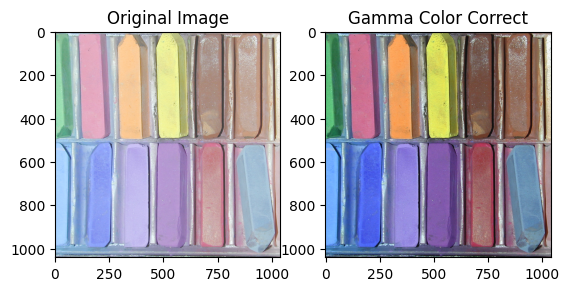

In [ ]:
img_ori = Image.open(r"C:\Users\23282\Desktop\PyL\DIP\imageset\chalk-RGB.tif")

img_color = gamma_transform(img_ori,c=1,gamma=2)

plt.figure()
plt.subplot(121),plt.title('Original Image'),plt.imshow(img_ori)
plt.subplot(122),plt.title('Gamma Color Correct'),plt.imshow(img_color)
plt.show()


In [ ]:
'''彩色平衡'''
image = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\woman-and-baby.tif")
image_rgb = image[:,:,::-1] #显示为RGB图像
#变为CMY图像
img_cmy = normalize(1 - normalize(image_rgb))
c,m,y = cv2.split(img_cmy)

#降低深红色
m_gama = np.power(m*1.0, 1.5)           
m_gama = normalize(m_gama)
img_newm = cv2.merge((c,m_gama,y))
img_newm =1 - img_newm
#增强青色
c_gama = np.power(c*1.0, 0.5)           
c_gama = normalize(c_gama)
img_newc = cv2.merge((c_gama,m,y))
img_newc =1 - img_newc
#增强黄色
y_gama = np.power(y*1.0, 0.2)           
y_gama = normalize(y_gama)
img_newy = cv2.merge((c,m,y_gama))
img_newy =1 - img_newy

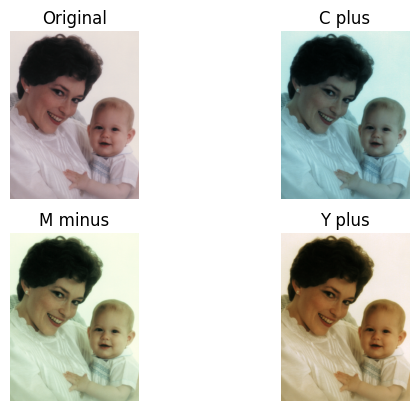

In [ ]:
plt.figure()
plt.subplot(221), plt.title('Original'), plt.imshow(image_rgb), plt.axis('off')
plt.subplot(222), plt.title('C plus'), plt.imshow(img_newc), plt.axis('off')
plt.subplot(223), plt.title('M minus'), plt.imshow(img_newm), plt.axis('off')
plt.subplot(224), plt.title('Y plus'), plt.imshow(img_newy), plt.axis('off')
plt.show()

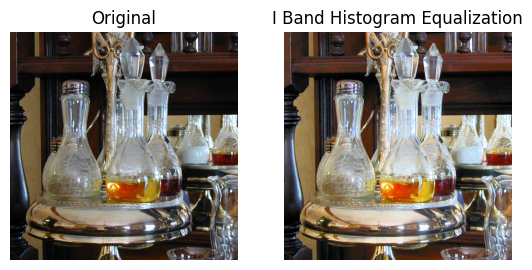

In [17]:
'''彩色图像直方图处理'''
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\glass-caster-RGB.tif")

img_rgb = img_ori[:,:,::-1] #显示为RGB图像

#将RGB图像转为HSI图像
img_hsi = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
h = img_hsi[:,:,0]
s = img_hsi[:,:,1]
i = img_hsi[:,:,2]
equ_i = cv2.equalizeHist(i,-1)

img = cv2.merge((h,s,equ_i))  #通道合并
img_rgb1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,6))
plt.subplot(131), plt.title('Original'), plt.imshow(img_rgb), plt.axis('off')
plt.subplot(132), plt.title('I Band Histogram Equalization'), plt.imshow(img_rgb1), plt.axis('off')
plt.show()


In [19]:
'''彩色图像平滑和锐化'''
#均值滤波器
def arithmentic_mean(image, kernel):
    """
    :param image: input image
    :param kernel: input kernel
    :return: image after convolution
    """
    
    img_h = image.shape[0]
    img_w = image.shape[1]

    m = kernel.shape[0]
    n = kernel.shape[1]

    # padding
    padding_h = int((m -1)/2)
    padding_w = int((n -1)/2)

    image_pad = np.pad(image.copy(), (padding_h, padding_w), mode="constant", constant_values=0)

    image_convol = image.copy()
    for i in range(padding_h, img_h + padding_h):
        for j in range(padding_w, img_w + padding_w):
            temp = np.sum(image_pad[i-padding_h:i+padding_h+1, j-padding_w:j+padding_w+1] * kernel)
            image_convol[i - padding_h][j - padding_w] = 1/(m * n) * temp
    image_convol = np.uint8(normalize(image_convol) * 255)
    return image_convol



In [29]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\lenna-RGB.tif")

img_rgb = img_ori[:,:,::-1]

r, g, b = cv2.split(img_rgb)#三个分量
#对三个分量进行滤波
mean_kernal = np.ones([5, 5])
rf = arithmentic_mean(r,mean_kernal)
gf = arithmentic_mean(g,mean_kernal)
bf = arithmentic_mean(b,mean_kernal)

img_new = cv2.merge((rf,gf,bf))

#对HSI的I分量进行滤波
img_hsi = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
h,s,i = cv2.split(img_hsi)
i_f = arithmentic_mean(i,mean_kernal)

hsi_new = cv2.merge((h,s,i_f))
img_new2 = cv2.cvtColor(hsi_new,cv2.COLOR_HSV2RGB)

Dif = img_new - img_new2

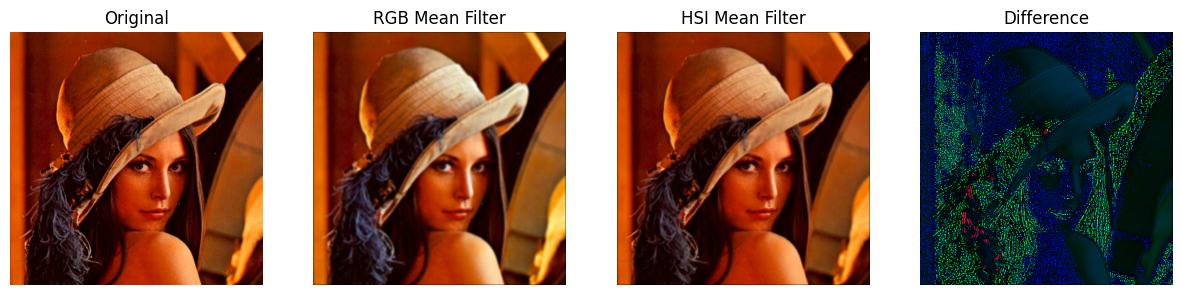

In [32]:
plt.figure(figsize=(15,9))
plt.subplot(141), plt.title('Original'), plt.imshow(img_rgb), plt.axis('off')
plt.subplot(142), plt.title('RGB Mean Filter'), plt.imshow(img_new), plt.axis('off')
plt.subplot(143), plt.title('HSI Mean Filter'), plt.imshow(img_new2), plt.axis('off')
plt.subplot(144), plt.title('Difference'), plt.imshow(Dif), plt.axis('off')
plt.show()

In [67]:
'''使用彩色分割图像'''
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\jupiter-moon-closeup.tif")

img_rgb = img_ori[:,:,::-1]
img_hsi = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)

h,s,i = cv2.split(img_hsi)

#对饱和度图像进行阈值处理
img_s = normalize(s)
thresh = 0.3
img_thresh = img_s.copy()
img_thresh = np.where(img_thresh <= thresh, img_thresh, 1)
img_thresh = np.where(img_thresh > thresh, img_thresh, 0)

#将色调图像与模板相乘，得到初步的分割结果
img_split1 = img_thresh * h

#阈值处理得到最终的分割结果
# Binary
img_binary = img_split1.copy()
img_binary = np.where(img_binary <= 125, img_binary, 255) # >125 为1
img_binary = np.where(img_binary > 125, img_binary, 0)  # < 125为0



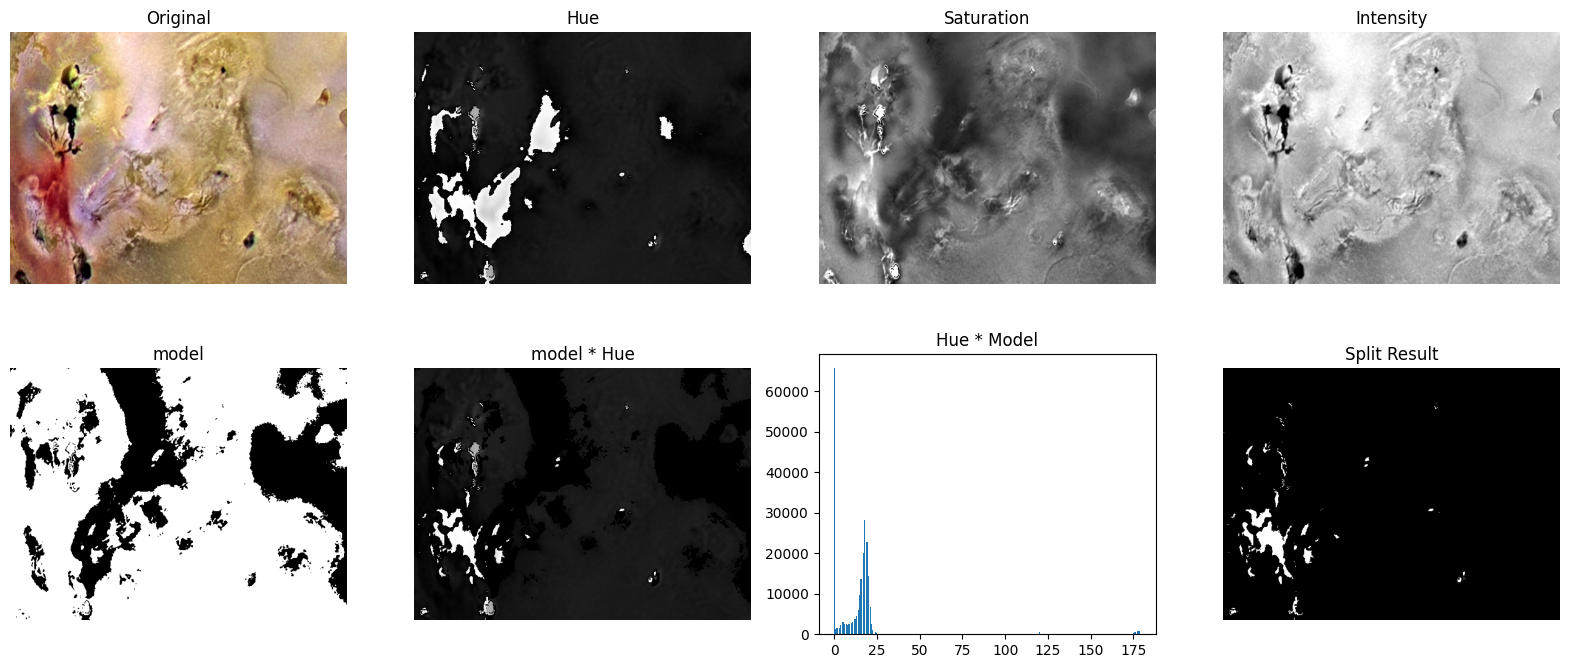

In [68]:
plt.figure(figsize=(20,8))
plt.subplot(241), plt.title('Original'), plt.imshow(img_rgb), plt.axis('off')
plt.subplot(242), plt.title('Hue'), plt.imshow(h,'gray'), plt.axis('off')
plt.subplot(243), plt.title('Saturation'), plt.imshow(s,'gray'), plt.axis('off')
plt.subplot(244), plt.title('Intensity'), plt.imshow(i,'gray'), plt.axis('off')
plt.subplot(245), plt.title('model'), plt.imshow(img_thresh,'gray'), plt.axis('off')
plt.subplot(246), plt.title('model * Hue'), plt.imshow(img_split1,'gray'), plt.axis('off')
# 直方图
plt.subplot(247), plt.hist(img_split1.flatten(), bins=256), plt.title('Hue * Model')
plt.subplot(248), plt.title('Split Result'), plt.imshow(img_binary,'gray'), plt.axis('off')
plt.show()

In [69]:
'''RGB空间分割图像'''
def rgb_segment(img_rgb, img_roi, d0):
    """
    在RGB空间分割图像，本函数利用的是欧氏距离
    img_rgb:输入rgb图像
    img_ori:感兴趣区域
    d0:满足在距离d0以内的像素被标示出来 
    """
    mean = np.mean(img_roi, axis=(0, 1))
    sigma = np.std(img_roi, axis=(0, 1))
    img_dst = np.zeros(img_rgb.shape[:2])
    height, width = img_dst.shape
    
    for h in range(height):
        for w in range(width):
            temp = img_rgb[h, w]
            if np.linalg.norm(temp - mean) <= d0:
                img_dst[h, w] = 1
            else:
                img_dst[h, w] = 0
                
    return img_dst


In [75]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\jupiter-moon-closeup.tif")
img_rgb = img_ori[:,:,::-1]

roi = img_rgb[240:315, 60:98, :]   #感兴趣区域

img_dst = rgb_segment(img_rgb, roi, d0=38)

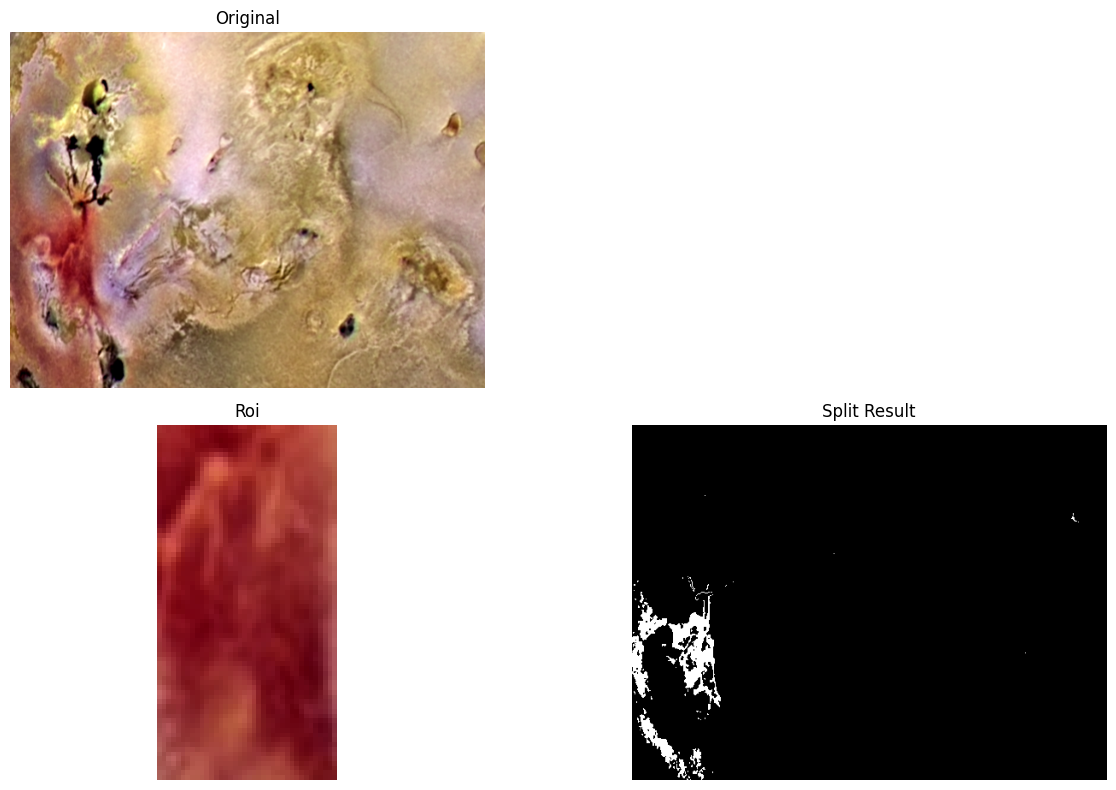

In [83]:
plt.figure(figsize=(13,8))
plt.subplot(221), plt.title('Original'), plt.imshow(img_rgb), plt.axis('off')
plt.subplot(223), plt.title('Roi'), plt.imshow(roi,'gray'), plt.axis('off')
plt.subplot(224), plt.title('Split Result'), plt.imshow(img_dst,'gray'), plt.axis('off')
plt.tight_layout()
plt.show()

In [100]:
'''彩色图像的噪声'''

img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\lenna-RGB.tif")
img_rgb = img_ori[:,:,::-1]

r,g,b = cv2.split(img_rgb)

#给图像添加高斯噪声
def add_guassian_noise(img, mean = 0, sigma = 0.1):
    '''给图像添加高斯噪声
    img:输入图像
    mean:噪声均值
    sigma:噪声标准差
    '''
    imag = np.array(img,dtype= float)
    noise = np.random.normal(mean,sigma,imag.shape)
    imag_out = imag + noise
    imag_out = np.uint8(normalize(imag_out)*255)

    return imag_out

#给三个分量添加噪声
rn = add_guassian_noise(r,mean = 0,sigma = 28)
gn = add_guassian_noise(g,mean = 0,sigma = 28)
bn = add_guassian_noise(b,mean = 0,sigma = 28)

img_noise = cv2.merge((rn,gn,bn))

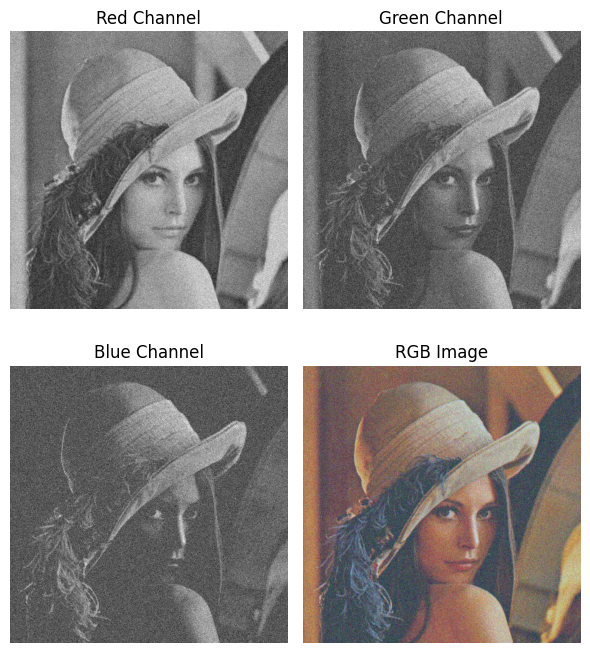

In [101]:
plt.figure(figsize=(6,7))
plt.subplot(221), plt.title('Red Channel'), plt.imshow(rn,'gray'), plt.axis('off')
plt.subplot(222), plt.title('Green Channel'), plt.imshow(gn,'gray'), plt.axis('off')
plt.subplot(223), plt.title('Blue Channel'), plt.imshow(bn,'gray'), plt.axis('off')
plt.subplot(224), plt.title('RGB Image'), plt.imshow(img_noise), plt.axis('off')
plt.tight_layout()
plt.show()

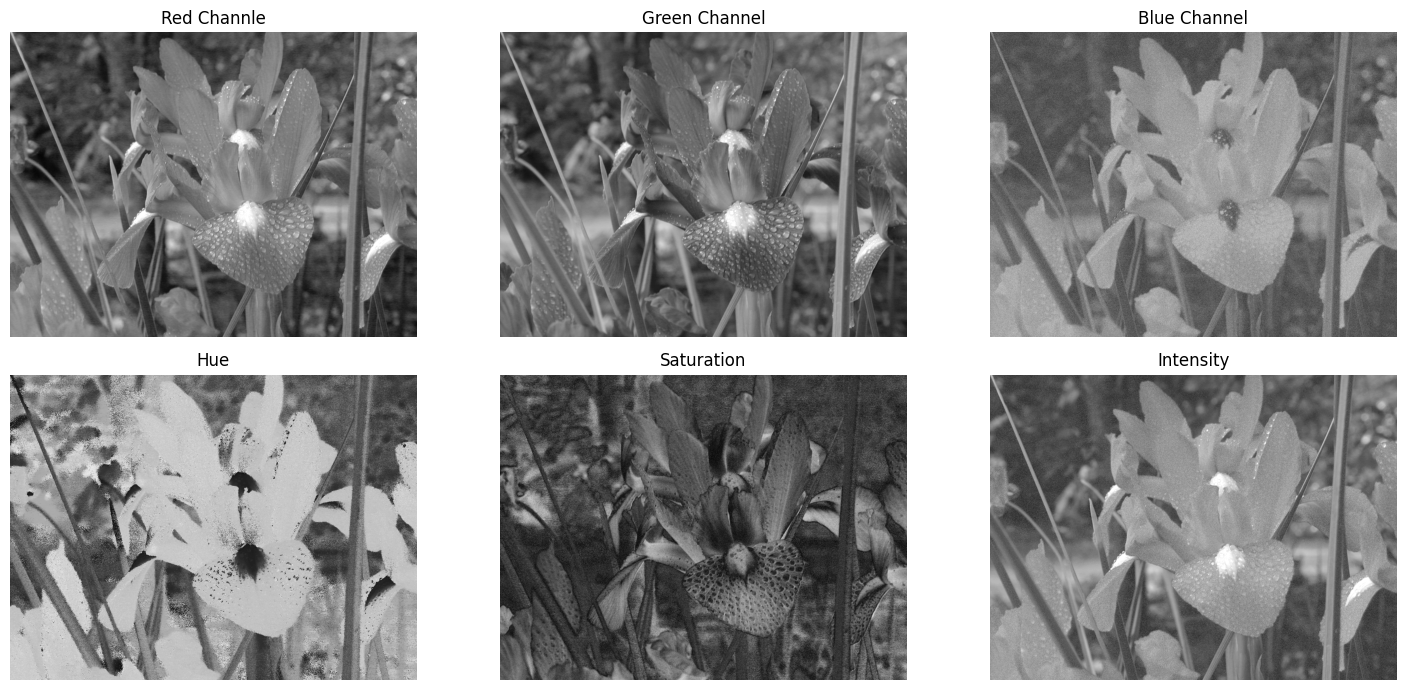

In [106]:
#只有一个RGB通道收到噪声影响时，到HSI的转换会将噪声分布到所有的HSI分量图像上
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\iris-RGB.tif")
img_rgb = img_ori[:,:,::-1]

r,g,b = cv2.split(img_rgb)
#给红色分量添加噪声
bn = add_guassian_noise(b,mean = 0,sigma = 38)

img_noise = cv2.merge((r,g,bn))

img_hsi = cv2.cvtColor(img_noise, cv2.COLOR_RGB2HSV_FULL)
plt.figure(figsize=(15, 7))
plt.subplot(2, 3, 1), plt.imshow(r, 'gray'), plt.title('Red Channle'), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(g, 'gray'), plt.title('Green Channel'), plt.axis('off')
plt.subplot(2, 3, 3), plt.imshow(bn, 'gray'), plt.title('Blue Channel'), plt.axis('off')
plt.subplot(2, 3, 4), plt.imshow(img_hsi[:, :, 0], 'gray'), plt.title('Hue'), plt.axis('off')
plt.subplot(2, 3, 5), plt.imshow(img_hsi[:, :, 1], 'gray'), plt.title('Saturation'), plt.axis('off')
plt.subplot(2, 3, 6), plt.imshow(img_hsi[:, :, 2], 'gray'), plt.title('Intensity'), plt.axis('off')

plt.tight_layout()
plt.show()   